# Prvi pogled na podatke


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("dataset/deliverytime.csv")
print('Ukupno je {} redova i {} stupaca.'.format(data.shape[0],data.shape[1]))

Ukupno je 45593 redova i 20 stupaca.


In [3]:
data.head() #prikaz prvih 5 objekata u skupu podataka

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
print("**" * 30)
print(" " * 18, "Informacije o skupu podataka")
print("**" * 30)
print(data.info())

************************************************************
                   Informacije o skupu podataka
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked   

Iz ovoga bi mogli misliti da ne postoje nedostajuće vrijednosti, ali neke su navedene kao stringovi 'NaN'.

## Nedostajeći podaci

In [5]:
#provjera nedostajućih podataka
data.replace('NaN', pd.NA, inplace=True)
data.replace('NaN ', pd.NA, inplace=True)
data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

## Micanje nedostajećih podataka

In [6]:
data.dropna(how='any', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41368 non-null  object 
 1   Delivery_person_ID           41368 non-null  object 
 2   Delivery_person_Age          41368 non-null  object 
 3   Delivery_person_Ratings      41368 non-null  object 
 4   Restaurant_latitude          41368 non-null  float64
 5   Restaurant_longitude         41368 non-null  float64
 6   Delivery_location_latitude   41368 non-null  float64
 7   Delivery_location_longitude  41368 non-null  float64
 8   Order_Date                   41368 non-null  object 
 9   Time_Orderd                  41368 non-null  object 
 10  Time_Order_picked            41368 non-null  object 
 11  Weatherconditions            41368 non-null  object 
 12  Road_traffic_density         41368 non-null  object 
 13  Vehicle_condition    

Nedostajući podaci postoje samo sto su zapisani kao string 'NaN' ili 'NaN '. Micemo sve redove koji sadrze nedostajuce vrijednosti.

In [7]:
data.duplicated().sum()

0

Ne postoje redovi koji se ponavljaju.

In [8]:
# provjera monotonih podataka
data.nunique()

ID                             41368
Delivery_person_ID              1320
Delivery_person_Age               20
Delivery_person_Ratings           26
Restaurant_latitude              487
Restaurant_longitude             389
Delivery_location_latitude      4361
Delivery_location_longitude     4361
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weatherconditions                  6
Road_traffic_density               4
Vehicle_condition                  3
Type_of_order                      4
Type_of_vehicle                    3
multiple_deliveries                4
Festival                           2
City                               3
Time_taken(min)                   45
dtype: int64

ID narudžbe bi trebao biti jedinstven, a vidimo da ima manje jedinstvenih ID-eova nego redova podataka.

ID je monotoni atribut te ga možemo izbaciti.

Možemo izbaciti i Delivery_person_ID jer očito ne utječe na predikciju.

## Transformacija kategoričkih stupaca koji bi trebali biti numerički

In [9]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [10]:
data['Delivery_person_Age'] = data['Delivery_person_Age'].astype(int)
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].astype(float)
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y')
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format='%H:%M:%S').dt.time
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], format='%H:%M:%S').dt.time
data['Datetime_Ordered'] = pd.to_datetime(data['Order_Date'].astype(str) + ' ' + data['Time_Orderd'].astype(str))
data['Datetime_Picked'] = pd.to_datetime(data['Order_Date'].astype(str) + ' ' + data['Time_Order_picked'].astype(str))

data.drop(['Order_Date', 'Time_Orderd', 'Time_Order_picked'], axis=1, inplace=True)

data['multiple_deliveries'] = data['multiple_deliveries'].astype(int)
data['Time_taken(min)'] = data['Time_taken(min)'].str.replace('(min) ', '').astype(int)


In [11]:
time_diff = data['Datetime_Picked'] - data['Datetime_Ordered']
mask = time_diff < pd.Timedelta(0)
data.loc[mask, 'Datetime_Picked'] += pd.Timedelta(days=1)
time_diff = data['Datetime_Picked'] - data['Datetime_Ordered']
time_diff.describe()

count                        41368
mean     0 days 00:09:59.354573583
std      0 days 00:04:05.165638151
min                0 days 00:05:00
25%                0 days 00:05:00
50%                0 days 00:10:00
75%                0 days 00:15:00
max                0 days 00:15:00
dtype: object

<Axes: >

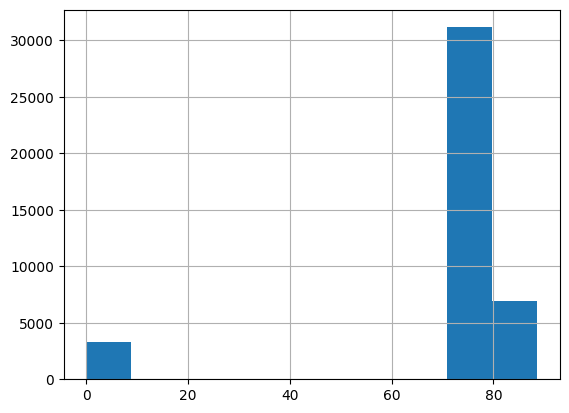

In [12]:
data['Weatherconditions'] = data['Weatherconditions'].str.replace('conditions ', '')
data['Festival'] = data['Festival'].replace(['No ', 'Yes '], [0, 1])
data.Delivery_location_longitude.hist()

## Pregled kategoričkih i numeričkih vrijednosti

In [13]:
#izbor numeričkih i kategoričkih varjabli
cols_num = data.select_dtypes(include = ['float','int']).columns.to_list()
cols_cat = data.select_dtypes(include = ['object', 'category']).columns.to_list()
cols_date = data.select_dtypes(include = ['datetime64']).columns.to_list()

In [14]:
print("Postoji {} numeričkih, {} kategoričkih i {} vremenske varijable.".format(len(cols_num), len(cols_cat), len(cols_date)))

Postoji 10 numeričkih, 7 kategoričkih i 2 vremenske varijable.


Text(0.5, 0, 'Time of delivery in minutes')

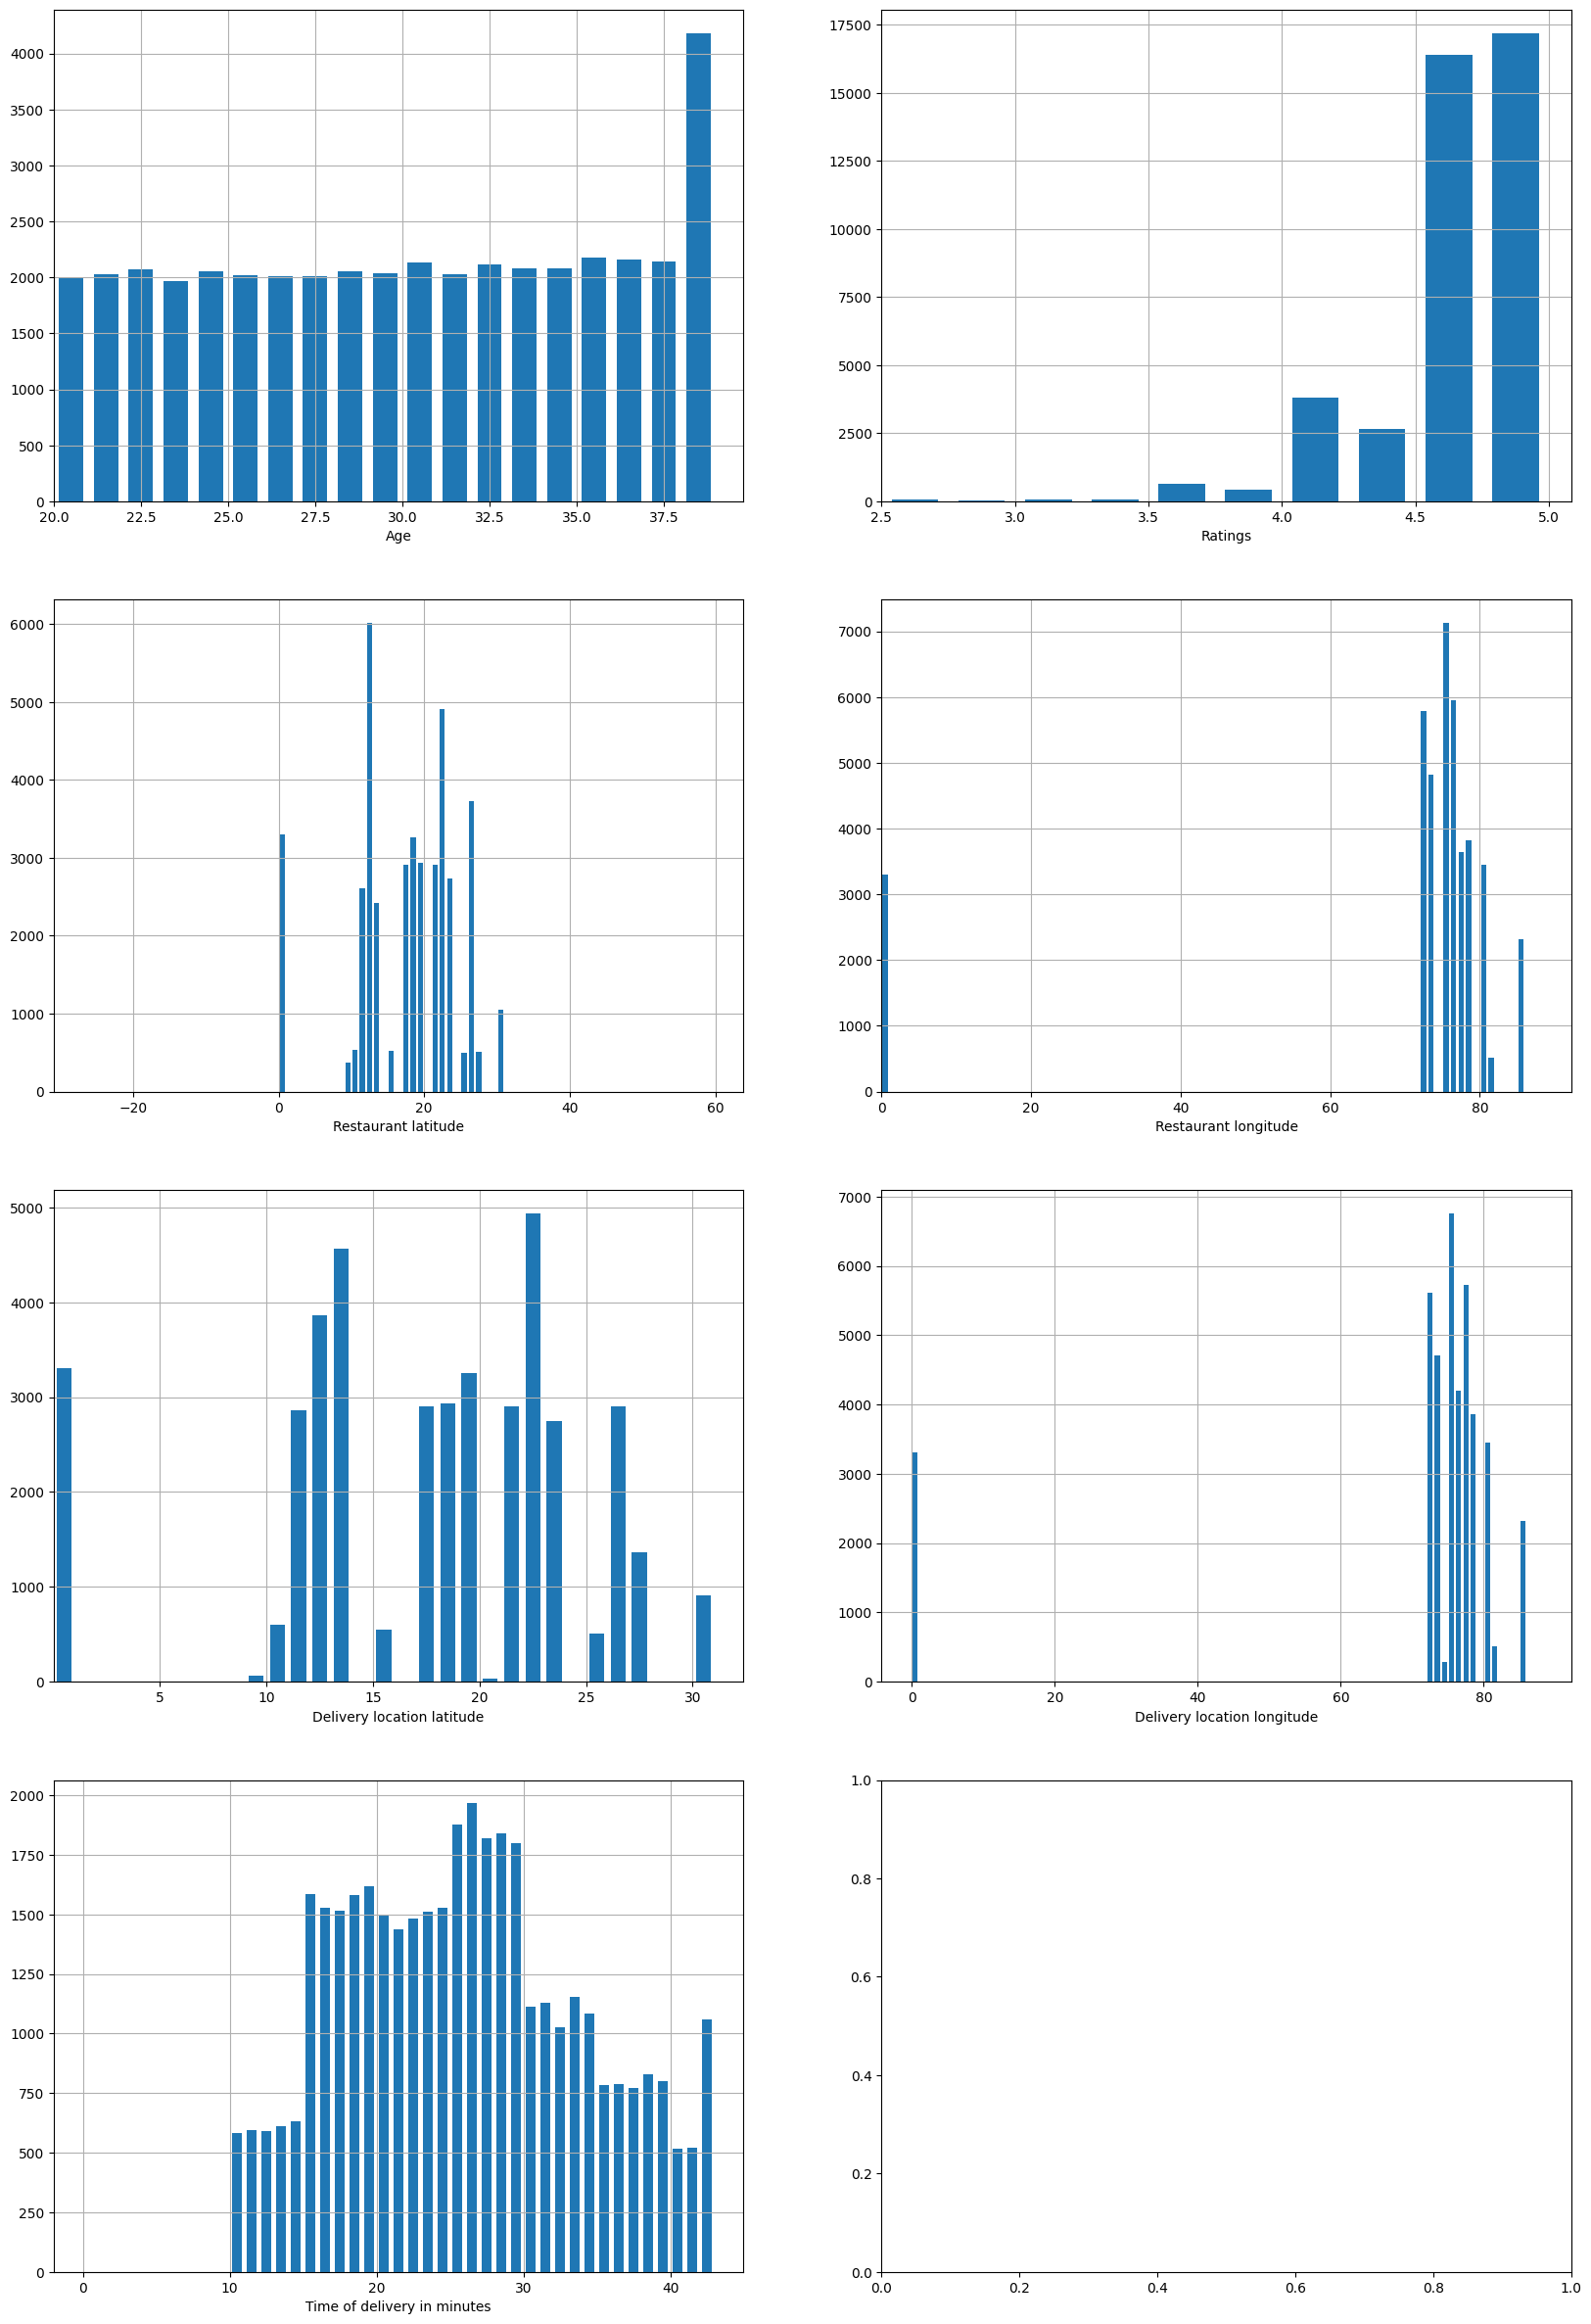

In [15]:

fig, ax = plt.subplots(4,2, figsize=(20,30)) 

ax[0,0].hist(data.Delivery_person_Age,rwidth=0.7, bins=max(data.Delivery_person_Age)-min(data.Delivery_person_Age))
ax[0,0].set_xlim(min(data.Delivery_person_Age))
ax[0,0].grid()
ax[0,0].set_xlabel('Age')

ax[0,1].hist(data.Delivery_person_Ratings, rwidth=0.7)
ax[0,1].grid()
ax[0,1].set_xlim(min(data.Delivery_person_Ratings))
ax[0,1].set_xlabel('Ratings')

ax[1,0].hist(data.Restaurant_latitude, rwidth=0.7, bins=np.arange(max(data.Restaurant_latitude)-min(data.Restaurant_latitude), step=1))
ax[1,0].grid()
ax[1,0].set_xlim(min(data.Restaurant_latitude))
ax[1,0].set_xlabel('Restaurant latitude')

ax[1,1].hist(data.Restaurant_longitude, rwidth=0.7, bins=np.arange(max(data.Restaurant_longitude)-min(data.Restaurant_longitude), step=1))
ax[1,1].grid()
ax[1,1].set_xlim(min(data.Restaurant_longitude))
ax[1,1].set_xlabel('Restaurant longitude')

ax[2,0].hist(data.Delivery_location_latitude,  rwidth=0.7, bins=np.arange(max(data.Delivery_location_latitude)-min(data.Delivery_location_latitude), step=1))
ax[2,0].grid()
ax[2,0].set_xlim(min(data.Delivery_location_latitude))
ax[2,0].set_xlabel('Delivery location latitude')

ax[2,1].hist(data.Delivery_location_longitude, rwidth=0.7, bins=np.arange(max(data.Delivery_location_longitude)-min(data.Delivery_location_longitude), step=1))
ax[2,1].grid()
ax[2,0].set_xlim(min(data.Delivery_location_longitude))
ax[2,1].set_xlabel('Delivery location longitude')

ax[3,0].hist(data['Time_taken(min)'], rwidth=0.7, bins=np.arange(max(data['Time_taken(min)'])-min(data['Time_taken(min)']), step=1))
ax[3,0].grid()
ax[3,0].set_xlabel('Time of delivery in minutes')

Nijedna varijabla naizgled ne dolazi iz normalne distribucije.

<Axes: xlabel='Type_of_order'>

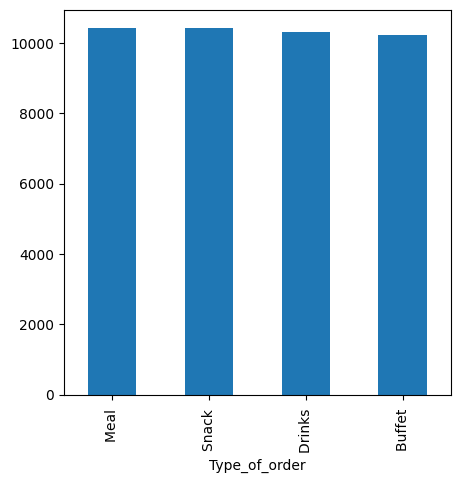

In [16]:
data['Type_of_order'].value_counts().plot(kind='bar', figsize=(5,5))

<Axes: xlabel='Type_of_vehicle'>

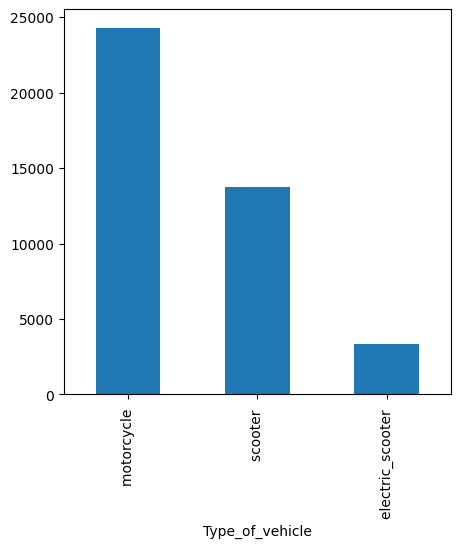

In [17]:
data['Type_of_vehicle'].value_counts().plot(kind='bar', figsize=(5,5))

Vidimo da je broj narudžaba otprilike isti za svaki tip narudžbe, dok je najčešće prijevozno sredstvo motor.

## Korelacijska matrica

[Text(0, 0, 'Delivery_person_Age'),
 Text(0, 1, 'Delivery_person_Ratings'),
 Text(0, 2, 'Restaurant_latitude'),
 Text(0, 3, 'Restaurant_longitude'),
 Text(0, 4, 'Delivery_location_latitude'),
 Text(0, 5, 'Delivery_location_longitude'),
 Text(0, 6, 'Vehicle_condition'),
 Text(0, 7, 'multiple_deliveries'),
 Text(0, 8, 'Festival'),
 Text(0, 9, 'Time_taken(min)')]

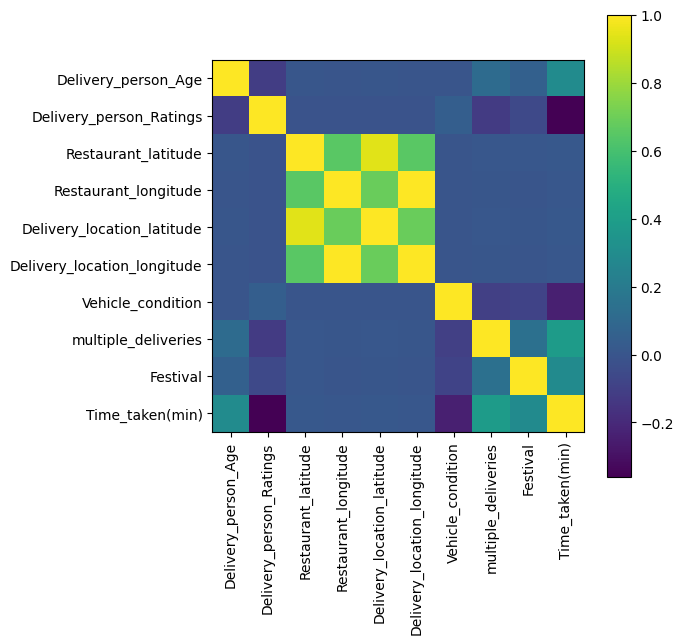

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
correlations = data[cols_num].corr()
plt.imshow(correlations)
plt.colorbar()
ticks = cols_num
ax.set_xticks(np.arange(len(ticks)))
ax.set_yticks(np.arange(len(ticks)))
ax.set_xticklabels(ticks, rotation=90)
ax.set_yticklabels(ticks)

Vidimo povezanost između geografske dužine restorana i mjesta dostave te između geografske dužine istih.

## Prikaz ovisnosti

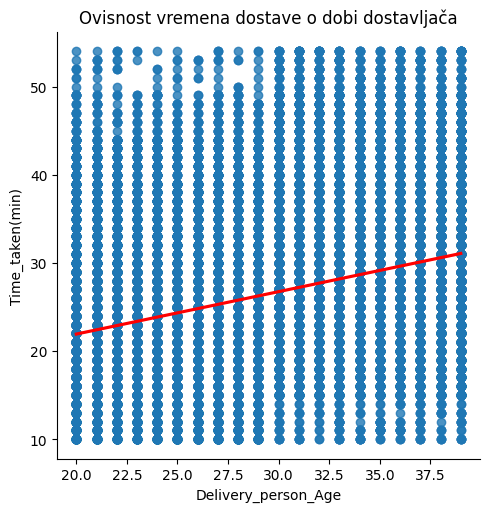

In [19]:
sns.lmplot(x='Delivery_person_Age',y='Time_taken(min)', data=data,  line_kws={'color': 'red'})
plt.title("Ovisnost vremena dostave o dobi dostavljača");

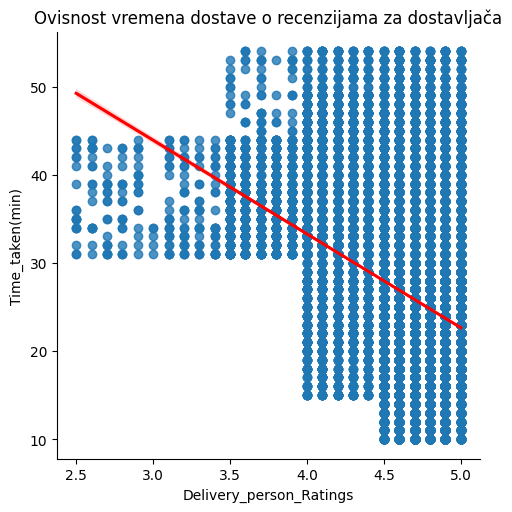

In [20]:
sns.lmplot(x='Delivery_person_Ratings',y='Time_taken(min)', data=data,  line_kws={'color': 'red'})
plt.title("Ovisnost vremena dostave o recenzijama za dostavljača");

Text(0.5, 1.0, 'Ovisnost vremena dostave o tipu narudžbe')

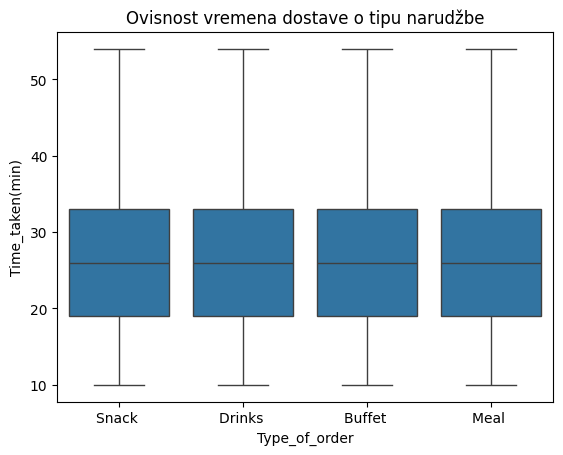

In [21]:
sns.boxplot(data=data, x='Type_of_order', y='Time_taken(min)')
plt.title('Ovisnost vremena dostave o tipu narudžbe')

Text(0.5, 1.0, 'Ovisnost vremena dostave o tipu vozila')

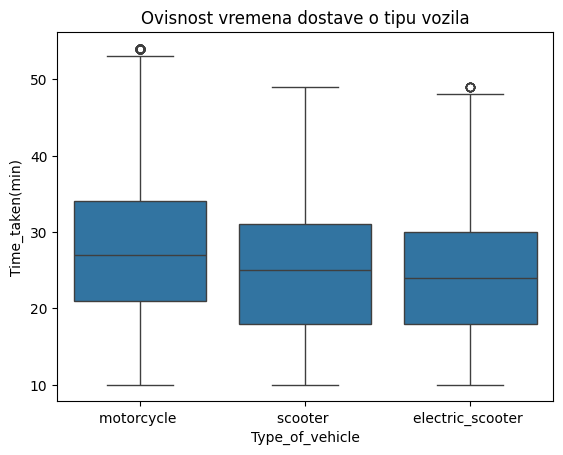

In [22]:
sns.boxplot(data=data, x='Type_of_vehicle', y='Time_taken(min)')
plt.title('Ovisnost vremena dostave o tipu vozila')

In [23]:
data.to_csv('dataset/cleaned_deliverytime.csv')